# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

**Proposito**
Nuestro principal proposito de este analisis es saber cuál de los planes genera más ingresos y comunicarlo con el departamento Comercial para que ellos puedan ajustar el presupuesto de publicidad. Y para ello:
1. Primero abrire los archivos que contienen los datos y estudiare la información que contengan de forma general.
2. Preparare los datos al corregir los errores que contengan.
3. Analizare los datos con medidas estadisticas como la desviacion estandar entre otras y creare graficas.
4. Probare la hipotesis estableciendo el valor Alpha y la hipotesis nula.
5. Escribire una Conclusion Final basada en los hallazgos obtenidos.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames 
megaline_calls = pd.read_csv('/datasets/megaline_calls.csv')
megaline_internet = pd.read_csv('/datasets/megaline_internet.csv')
megaline_messages = pd.read_csv('/datasets/megaline_messages.csv')
megaline_plans = pd.read_csv('/datasets/megaline_plans.csv')
megaline_users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

**Prepararemos los datos al corregir y enriquecer las tablas en el siguiente orden:**
1. Tarifas(plans)
2. Usuarios
3. Llamadas(calls)
4. Mensajes
5. Internet

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
megaline_plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
megaline_internet['gb_used'] = megaline_internet['mb_used']/1024
megaline_plans['gbs_per_month_included'] = megaline_plans['mb_per_month_included']/1024
megaline_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gbs_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


En un futuro tendremos que hacer un merge con el conjunto de datos llamado `megaline_users` y este conjunto de datos llamado `megaline_plans` y tendremos que encontrar una columna que ambas contengan en comun para poder juntarlas y asi poder analizar el plan que cada cliente selecciono y su uso y la ganacia que cada uno le genera a la empresa.

## Usuarios/as

In [5]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Imprime una muestra de datos para usuarios
megaline_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Puedo ver que la columna del `plan` no coincide con el mismo nombre del conjunto de datos `megaline_plans` por lo cual tenemos dos opcines para poder juntarlas con `merge` y una de ellas es renombrar una de las 2 columnas para que coincidan o simplemente usar `out` de merge.

### Corregir los datos

In [7]:
megaline_users['reg_date'] = pd.to_datetime(megaline_users['reg_date'], format = '%Y-%m-%d')
megaline_users['churn_date'] = pd.to_datetime(megaline_users['churn_date'], format = '%Y-%m-%d')

### Enriquecer los datos

In [8]:
megaline_users['month'] = megaline_users['reg_date'].dt.month
megaline_users['exp_month'] = megaline_users['churn_date'].dt.month
megaline_users.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,exp_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,10,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,5,NaN


Enriquecimos los datos al usar merge con el conjunto de datos `megaline_plans` y el conjunto `megaline_users` que nos permite ver el plan que cada usuario compro.

## Llamadas

In [9]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
megaline_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Imprime una muestra de datos para las llamadas
megaline_calls.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


La columna `'call_date'` al igual que los demas conjuntos de datos no viene en el `Dtype` que necesitamos para poder hacer nuestros analisis asi que tendremos que configurarlo segun nuestras necesidades ya que siendo un `Dtype` objeto no nos ayudara de mucho.

### Corregir los datos

In [11]:
megaline_calls['call_date'] = pd.to_datetime(megaline_calls['call_date'], format = '%Y-%m-%d')

### Enriquecer los datos

In [12]:
megaline_calls['month'] = megaline_calls['call_date'].dt.month
megaline_calls['duration_ceil'] = np.ceil(megaline_calls['duration'])
megaline_calls['duration_ceil'] = megaline_calls['duration_ceil'].astype(int)
megaline_calls.head()


,id,user_id,call_date,duration,month,duration_ceil
0,1000_93,1000,2018-12-27,8.52,12,9
1,1000_145,1000,2018-12-27,13.66,12,14
2,1000_247,1000,2018-12-27,14.48,12,15
3,1000_309,1000,2018-12-28,5.76,12,6
4,1000_380,1000,2018-12-30,4.22,12,5


In [13]:
monthly_calls_duration = megaline_calls.groupby(['user_id', 'month'])['duration_ceil'].sum().reset_index()
monthly_calls_duration.head()

,user_id,month,duration_ceil
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426


In [14]:
megaline_calls_total = megaline_calls.groupby(['user_id', 'month'])['id'].count().reset_index()
megaline_calls_total.head()

,user_id,month,id
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


Mejoramos este conjunto de datos creando un conjunto llamado `monthly_calls_duration` que nos provee de la duracion de llamadas por mes por usuario y otro conjunto de datos llamado `megaline_calls_total` que nos provee de la cantidad total de llamads por mes por usuario.

## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
megaline_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
# Imprime una muestra de datos para los mensajes
megaline_messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


La columna `message_date` aparece como un tipo de dato objeto pero eso nos causaria un problema en un futuro ya que no nos permitiria poder analizar por mes ni por año ni por dia por lo cual en ese formato no nos sirve de mucho, para solucionarlo y poder utilizarlo vamos a cambiar su tipo de datos a `to_datetime` y lo pondremos en el formato que corresponde para poder utilizarlo para analizar por mes los mensajes enviados.

### Corregir los datos

In [17]:
megaline_messages['message_date'] = pd.to_datetime(megaline_messages['message_date'], format = '%Y-%m-%d')

### Enriquecer los datos

In [18]:
megaline_messages['month'] = megaline_messages['message_date'].dt.month
megaline_messages.sample(5)

,id,user_id,message_date,month
73173,1470_801,1470,2018-09-02,9
57504,1362_591,1362,2018-09-17,9
72381,1470_9,1470,2018-07-06,7
36619,1244_51,1244,2018-12-16,12
47391,1324_104,1324,2018-12-08,12


In [19]:
monthly_messages = megaline_messages.groupby(['user_id', 'month'])['id'].count().reset_index()
monthly_messages.sample(8)


,user_id,month,id
1514,1408,9,45
1350,1362,4,42
399,1113,10,40
1580,1433,11,123
1142,1312,3,28
1626,1445,3,9
34,1011,11,58
135,1046,11,31


In [20]:
monthly_messages_in_order = monthly_messages.sort_values(['user_id', 'month'], ascending = False)
monthly_messages.head(15)

,user_id,month,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
5,1001,12,44
6,1002,10,15
7,1002,11,32
8,1002,12,41
9,1003,12,50


Enriquecimos el conjunto de datos `megaline_messages` al agregar una columna que nos proporcionara el mes y al crear otro conjunto de datos llamado `monthly_messages` que nos proporciona la cantidad de mensajes que cada usuario ha enviado por mes. Al final creamos otro conjunto de datos llamado `monthly_messages_in_order` que nos permite ver en orden descendente la cantidad de mensajes que los clientes envian por mes tambien en orden descendente y aqui podemos descubrir algo muy interesante y es que no tenemos registros de todos los meses por usuario por ejemplo para el usuario 1497 solo tenemos registros del mes 12 y por otro lado para el usuario 1496 tenemos solamente el registro de 5 meses del mes 12 al mes 8 y asi con varios usuarios lo que podrian significar varias cosas y una de ellas podria ser que los usuarios no contrataran el plan todos los meses del año si no unos cuantos y esto quizas podria en un futuro ayudar a hacer un analisis de cuales son los meses en los que los clientes compran mas o menos planes.

## Internet

In [21]:
# Imprime la información general/resumida sobre el DataFrame de internet
megaline_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
 4   gb_used       104825 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.0+ MB


In [22]:
# Imprime una muestra de datos para el tráfico de internet
megaline_internet.head()

,id,user_id,session_date,mb_used,gb_used
0,1000_13,1000,2018-12-29,89.86,0.087754
1,1000_204,1000,2018-12-31,0.00,0.000000
2,1000_379,1000,2018-12-28,660.40,0.644922
3,1000_413,1000,2018-12-26,270.99,0.264639
4,1000_442,1000,2018-12-27,880.22,0.859590


### Corregir los datos

La columna `session_date` aparece como un tipo de dato objeto pero eso nos causaria un problema en un futuro ya que no nos permitiria poder analizar por mes ni por año ni por dia por lo cual en ese formato no nos sirve de mucho, para solucionarlo y poder utilizarlo vamos a cambiar su tipo de datos a `to_datetime` y lo pondremos en el formato que corresponde para poder utilizarlo y analizar por mes los gigabytes usados y de hecho debido a que tenemos los bytes en megas tendremos tambien que convertilos en gigabytes diviendo los valores de la columna `mb_used` entre `1024` .

In [23]:
print(megaline_internet.dtypes)
megaline_internet['session_date'] = pd.to_datetime(megaline_internet['session_date'], format = '%Y-%m-%d')


id               object
user_id           int64
session_date     object
mb_used         float64
gb_used         float64
dtype: object


### Enriquecer los datos

In [24]:
megaline_internet['month'] = megaline_internet['session_date'].dt.month
megaline_internet.head()

,id,user_id,session_date,mb_used,gb_used,month
0,1000_13,1000,2018-12-29,89.86,0.087754,12
1,1000_204,1000,2018-12-31,0.00,0.000000,12
2,1000_379,1000,2018-12-28,660.40,0.644922,12
3,1000_413,1000,2018-12-26,270.99,0.264639,12
4,1000_442,1000,2018-12-27,880.22,0.859590,12


In [25]:
megaline_internet['gb_used'] = megaline_internet['mb_used']/1024
monthly_gb_used = megaline_internet.groupby(['user_id', 'month'])['gb_used'].sum().reset_index()
monthly_gb_used.head(10)

,user_id,month,gb_used
0,1000,12,1.856904
1,1001,8,6.756982
2,1001,9,13.002754
3,1001,10,21.807119
4,1001,11,18.070605
5,1001,12,18.915215
6,1002,10,6.398447
7,1002,11,18.891680
8,1002,12,14.058828
9,1003,12,26.410293


In [26]:
monthly_gb_used['gb_used_per_month'] = np.ceil(monthly_gb_used['gb_used'])
monthly_gb_used['gb_used_per_month'] = monthly_gb_used['gb_used_per_month'].astype(int)
monthly_gb_used.head()

,user_id,month,gb_used,gb_used_per_month
0,1000,12,1.856904,2
1,1001,8,6.756982,7
2,1001,9,13.002754,14
3,1001,10,21.807119,22
4,1001,11,18.070605,19


Enriquecimos este conjunto de datos al usarlo para crear otro conjunto de datos llamado `monthly_gb_used` que contiene otra columna llamada `gb_used` y contiene la cantidad de gigabytes de cada usuario consumidos por mes  y por ultimo agregamos otra columna llamada `gb_used_ceil` lo cual ayuda a nuestra analisis futuro ya que se nos comentaba que al final ya teniendo la cantidad de megas usados por mes se redondea hacia arriba y nuestra columna `gb_used_ceil` es lo que contiene el redonde a gigas  usados por mes.

## Estudiar las condiciones de las tarifas

In [27]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

users_data = megaline_users.merge(megaline_plans, how = "left", left_on = "plan", right_on = "plan_name")
users_data.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,exp_month,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gbs_per_month_included
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,NaN,50,15360,500,20,10,0.03,0.03,surf,15.0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,10,NaN,50,15360,500,20,10,0.03,0.03,surf,15.0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1,NaN,50,15360,500,20,10,0.03,0.03,surf,15.0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,5,NaN,50,15360,500,20,10,0.03,0.03,surf,15.0


## Agregar datos por usuario


In [28]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
megaline_calls_total = megaline_calls.groupby(['user_id', 'month'])['id'].count().reset_index()
megaline_calls_total.head()

,user_id,month,id
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [29]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
monthly_calls_duration = megaline_calls.groupby(['user_id', 'month'])['duration_ceil'].sum().reset_index()
monthly_calls_duration.head()

,user_id,month,duration_ceil
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426


In [30]:
calls_data = megaline_calls_total.merge(monthly_calls_duration, on = ['user_id', 'month'], how = 'outer')

In [31]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
monthly_messages = megaline_messages.groupby(['user_id', 'month']).agg(mensajes_enviados = ('id', 'count')).reset_index()
monthly_messages.head()

,user_id,month,mensajes_enviados
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [32]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_data = (
    megaline_internet
    .groupby(['user_id', 'month'])
    [['mb_used']]
    .sum()
    .rename(columns = {'mb_used': 'volume_of_data_used'})
    .assign(volume_of_data_used = lambda a : np.ceil(a['volume_of_data_used']/1024))
    .reset_index()    
)
internet_data.head()

,user_id,month,volume_of_data_used
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0


In [33]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
calls_and_messages = calls_data.merge(monthly_messages, on = ['user_id', 'month'], how = 'outer')
usage_table        = calls_and_messages.merge(internet_data, on = ['user_id', 'month'], how = 'outer')
usage_table.head()

,user_id,month,id,duration_ceil,mensajes_enviados,volume_of_data_used
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,27.0,182.0,30.0,7.0
2,1001,9,49.0,315.0,44.0,14.0
3,1001,10,65.0,393.0,53.0,22.0
4,1001,11,64.0,426.0,36.0,19.0


In [34]:
# Añade la información de la tarifa
usage_table = usage_table.merge(users_data, on = ['user_id'], how = 'outer')
usage_table['mb_per_month_included'] = usage_table['mb_per_month_included']/1024
usage_table = usage_table.rename(columns = {'mb_per_month_included': 'gb_per_month_included'})
usage_table

,user_id,month_x,id,duration_ceil,mensajes_enviados,volume_of_data_used,first_name,last_name,age,city,...,exp_month,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gbs_per_month_included
0,1000,12.0,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,NaN,1000,30.0,3000,70,7,0.01,0.01,ultimate,30.0
1,1001,8.0,27.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaN,50,15.0,500,20,10,0.03,0.03,surf,15.0
2,1001,9.0,49.0,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaN,50,15.0,500,20,10,0.03,0.03,surf,15.0
3,1001,10.0,65.0,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaN,50,15.0,500,20,10,0.03,0.03,surf,15.0
4,1001,11.0,64.0,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaN,50,15.0,500,20,10,0.03,0.03,surf,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",...,NaN,50,15.0,500,20,10,0.03,0.03,surf,15.0
2299,1319,NaN,NaN,NaN,NaN,NaN,Eliseo,Carson,21,"Colorado Springs, CO MSA",...,NaN,50,15.0,500,20,10,0.03,0.03,surf,15.0
2300,1378,NaN,NaN,NaN,NaN,NaN,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",...,NaN,50,15.0,500,20,10,0.03,0.03,surf,15.0
2301,1463,NaN,NaN,NaN,NaN,NaN,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",...,NaN,1000,30.0,3000,70,7,0.01,0.01,ultimate,30.0


In [35]:
#Ingreso Mensual de Mensajes:
extra_messages = usage_table['mensajes_enviados'] - usage_table['messages_included']
extra_messages = extra_messages.fillna(0)
extra_messages = [0 if x < 0 else x for x in extra_messages]
extra_messages = pd.Series(extra_messages)
usage_table['extra_messages'] = extra_messages * usage_table['usd_per_message']
usage_table.query('extra_messages>0')
usage_table.head()

,user_id,month_x,id,duration_ceil,mensajes_enviados,volume_of_data_used,first_name,last_name,age,city,...,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gbs_per_month_included,extra_messages
0,1000,12.0,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,1000,30.0,3000,70,7,0.01,0.01,ultimate,30.0,0.00
1,1001,8.0,27.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,50,15.0,500,20,10,0.03,0.03,surf,15.0,0.00
2,1001,9.0,49.0,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,50,15.0,500,20,10,0.03,0.03,surf,15.0,0.00
3,1001,10.0,65.0,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,50,15.0,500,20,10,0.03,0.03,surf,15.0,0.09
4,1001,11.0,64.0,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,50,15.0,500,20,10,0.03,0.03,surf,15.0,0.00


In [36]:
#Ingreso Mensual de llamadas
extra_calls = usage_table['duration_ceil'] - usage_table['minutes_included']
extra_calls = extra_calls.fillna(0)
extra_calls = [0 if x < 0 else x for x in extra_calls]
extra_calls = pd.Series(extra_calls)
usage_table['extra_calls'] = extra_calls * usage_table['usd_per_minute']
usage_table.query('extra_calls>0')

,user_id,month_x,id,duration_ceil,mensajes_enviados,volume_of_data_used,first_name,last_name,age,city,...,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gbs_per_month_included,extra_messages,extra_calls
9,1003,12.0,149.0,1104.0,50.0,27.0,Reynaldo,Jenkins,52,"Tulsa, OK MSA",...,15.0,500,20,10,0.03,0.03,surf,15.0,0.00,18.12
23,1007,10.0,80.0,645.0,59.0,37.0,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",...,15.0,500,20,10,0.03,0.03,surf,15.0,0.27,4.35
24,1007,11.0,80.0,524.0,48.0,24.0,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",...,15.0,500,20,10,0.03,0.03,surf,15.0,0.00,0.72
25,1007,12.0,87.0,617.0,50.0,29.0,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",...,15.0,500,20,10,0.03,0.03,surf,15.0,0.00,3.51
29,1009,5.0,71.0,534.0,NaN,20.0,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",...,15.0,500,20,10,0.03,0.03,surf,15.0,0.00,1.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2205,1489,10.0,66.0,518.0,84.0,15.0,Londa,Jenkins,72,"Detroit-Warren-Dearborn, MI MSA",...,15.0,500,20,10,0.03,0.03,surf,15.0,1.02,0.54
2220,1491,10.0,75.0,585.0,51.0,9.0,Terina,Jensen,22,"Grand Rapids-Kentwood, MI MSA",...,15.0,500,20,10,0.03,0.03,surf,15.0,0.03,2.55
2235,1494,10.0,78.0,616.0,38.0,15.0,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,15.0,500,20,10,0.03,0.03,surf,15.0,0.00,3.48
2236,1494,11.0,82.0,509.0,35.0,18.0,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,15.0,500,20,10,0.03,0.03,surf,15.0,0.00,0.27


In [37]:
usage_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 2303 non-null   int64         
 1   month_x                 2293 non-null   float64       
 2   id                      2258 non-null   float64       
 3   duration_ceil           2258 non-null   float64       
 4   mensajes_enviados       1806 non-null   float64       
 5   volume_of_data_used     2277 non-null   float64       
 6   first_name              2303 non-null   object        
 7   last_name               2303 non-null   object        
 8   age                     2303 non-null   int64         
 9   city                    2303 non-null   object        
 10  reg_date                2303 non-null   datetime64[ns]
 11  plan                    2303 non-null   object        
 12  churn_date              160 non-null    datetime

In [38]:
#Ingreso mensual de datos 
usage_table
extra_data = usage_table['volume_of_data_used'] - usage_table['gb_per_month_included']
extra_data = extra_data.fillna(0)
extra_data = [0 if x < 0 else x for x in extra_data]
extra_data = pd.Series(extra_data)
usage_table['extra_data'] = extra_data * usage_table['usd_per_gb']
usage_table.query('extra_data>0')

,user_id,month_x,id,duration_ceil,mensajes_enviados,volume_of_data_used,first_name,last_name,age,city,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gbs_per_month_included,extra_messages,extra_calls,extra_data
3,1001,10.0,65.0,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,500,20,10,0.03,0.03,surf,15.0,0.09,0.00,70.0
4,1001,11.0,64.0,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,500,20,10,0.03,0.03,surf,15.0,0.00,0.00,40.0
5,1001,12.0,56.0,412.0,44.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,500,20,10,0.03,0.03,surf,15.0,0.00,0.00,40.0
7,1002,11.0,55.0,386.0,32.0,19.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",...,500,20,10,0.03,0.03,surf,15.0,0.00,0.00,40.0
9,1003,12.0,149.0,1104.0,50.0,27.0,Reynaldo,Jenkins,52,"Tulsa, OK MSA",...,500,20,10,0.03,0.03,surf,15.0,0.00,18.12,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2284,1194,10.0,NaN,NaN,88.0,31.0,Robert,Mclean,40,"San Jose-Sunnyvale-Santa Clara, CA MSA",...,500,20,10,0.03,0.03,surf,15.0,1.14,0.00,160.0
2285,1194,11.0,NaN,NaN,62.0,42.0,Robert,Mclean,40,"San Jose-Sunnyvale-Santa Clara, CA MSA",...,500,20,10,0.03,0.03,surf,15.0,0.36,0.00,270.0
2286,1194,12.0,NaN,NaN,56.0,31.0,Robert,Mclean,40,"San Jose-Sunnyvale-Santa Clara, CA MSA",...,500,20,10,0.03,0.03,surf,15.0,0.18,0.00,160.0
2288,1204,12.0,NaN,NaN,78.0,36.0,Sherly,Levy,44,"Chicago-Naperville-Elgin, IL-IN-WI MSA",...,3000,70,7,0.01,0.01,ultimate,30.0,0.00,0.00,42.0


## Estudia el comportamiento de usuario

### Llamadas

In [39]:
#Dataframa para duración de llamadas promedio
df_dur_prom = usage_table.groupby(['month_x', 'plan_name'])['duration_ceil'].mean().reset_index()
df_dur_prom.head()

,month_x,plan_name,duration_ceil
0,1.0,surf,203.000000
1,1.0,ultimate,193.500000
2,2.0,surf,297.000000
3,2.0,ultimate,470.333333
4,3.0,surf,330.000000


<AxesSubplot:xlabel='month_x'>

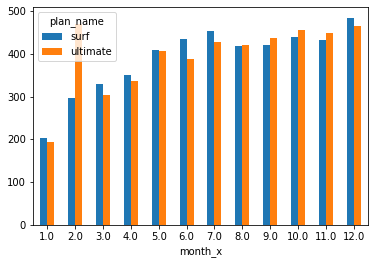

In [40]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
graf_call_dur = df_dur_prom.pivot(index = 'month_x', columns = 'plan_name',values = 'duration_ceil')
graf_call_dur.plot(kind = 'bar', rot = 360)



array([[<AxesSubplot:title={'center':'surf'}>,
        <AxesSubplot:title={'center':'ultimate'}>]], dtype=object)

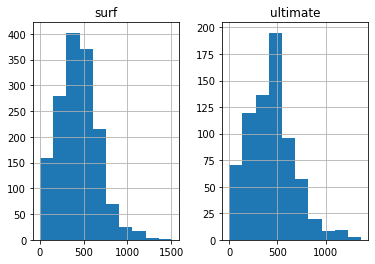

In [41]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
graf_min_month = usage_table.pivot(index = ['month_x', 'user_id'], columns = 'plan_name',values = 'duration_ceil')
graf_min_month.hist()

Ahora vamos a calcular la media y la varianza de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.

In [42]:
# Media calculada para duración de llamadas
df_dur_prom = usage_table.groupby(['month_x', 'plan_name'])['duration_ceil'].mean().reset_index()
df_dur_prom.head()

,month_x,plan_name,duration_ceil
0,1.0,surf,203.000000
1,1.0,ultimate,193.500000
2,2.0,surf,297.000000
3,2.0,ultimate,470.333333
4,3.0,surf,330.000000


In [43]:
#varianza para el plan surf
df_surf =df_dur_prom[df_dur_prom['plan_name']== 'surf']
df_surf_var = df_surf['duration_ceil'].var()
df_surf_var

6374.619145867013

In [44]:
#varianza para el plan ultimate
df_ultimate = df_dur_prom[df_dur_prom['plan_name']== 'ultimate']
df_ultimate_var = df_ultimate['duration_ceil'].var()
df_ultimate_var

6638.451229390735

Text(0.5, 1.0, 'distribución de la duración mensual de llamadas por plan')

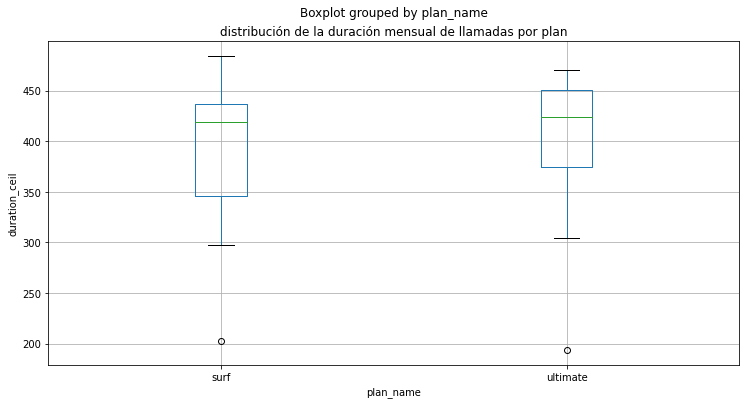

In [45]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
duration_box_plot = df_dur_prom.boxplot(column = 'duration_ceil', by = 'plan_name', figsize = [12,6])
duration_box_plot.set_ylabel('duration_ceil')
duration_box_plot.set_title('distribución de la duración mensual de llamadas por plan')

En el grafico de arriba podemos ver que tenemos una cantidad muy similar de personas que compran cada plan. Tambien podemos ver que aquellos que compraron el plan ultimate tienen un porcentaje mayor de personas que duran mas tiempo y tiene sentido ya que el plan es mas costos y brinda mas beneficios, otro punto es que ambos tienen valores atipicos en la parte inferior lo que representa que en ambos planes hay usuarios que usan muy poco de sus beneficios y por ultimo tambien podemos ver que el ultimo cuartil del plan surf se extiende mas arriba que el plan ultimate por lo que a pesar que el plan ultimate superaba por mas a surf en el cuartil anterior resulta que en el ultimo cuartil surf supera a ultimate lo que representa que hay usuarios en surf que consumen mas que los usuarios con el plan ultimate.

### Mensajes

In [46]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
df_mensajes_prom = usage_table.groupby(['month_x', 'plan_name'])['mensajes_enviados'].mean().reset_index()
df_mensajes_prom.head()

,month_x,plan_name,mensajes_enviados
0,1.0,surf,21.000000
1,1.0,ultimate,20.666667
2,2.0,surf,21.600000
3,2.0,ultimate,25.166667
4,3.0,surf,21.937500


In [47]:
df_mensajes_surf = df_mensajes_prom[df_mensajes_prom['plan_name']== 'surf']
df_mensajes_var = df_mensajes_surf['mensajes_enviados'].var()
df_mensajes_var

84.26436783310633

In [48]:
df_mensajes_ultimate = df_mensajes_prom[df_mensajes_prom['plan_name']== 'ultimate']
df_mensajes_var = df_mensajes_ultimate['mensajes_enviados'].var()
df_mensajes_var

106.65535848341665

Text(0.5, 1.0, 'distribución de mensajes mensualmente enviados por plan')

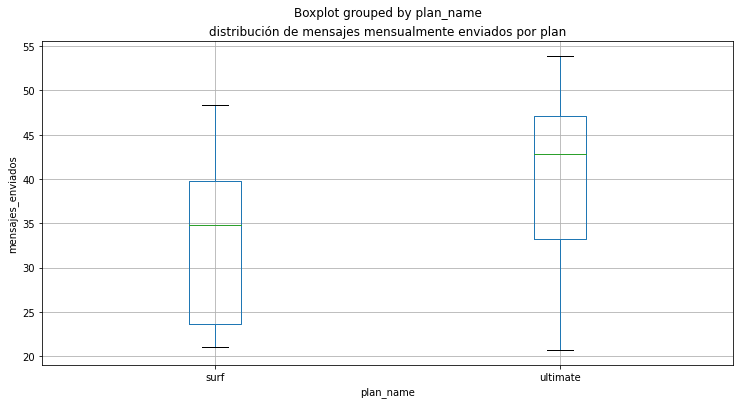

In [49]:
mensajes_box_plot = df_mensajes_prom.boxplot(column = 'mensajes_enviados', by = 'plan_name', figsize = [12,6])
mensajes_box_plot.set_ylabel('mensajes_enviados')
mensajes_box_plot.set_title('distribución de mensajes mensualmente enviados por plan')

Podemos ver que el comportamiento de uso de mensajes de los usuarios varia en gran manera en base a su plan podemos ver que los usuarios que compraron el plan `ultimate` envian mas mensajes ya que podemos ver que la concentración del box_plot se concentra mas arriba que el de los usuarios que tienen el plan `surf`.

La mediana del plan `surf` de mensajes enviados es de aproximadamente 35 mientras que la mediana de mensajes enviados para los usuarios del plan `ultimate` es de aproximadamente 43 lo cual nos dice que la mediana del plan `surf` es inferior que la del plan `ultimate`.

### Internet

In [50]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
df_data_prom = usage_table.groupby(['month_x', 'plan_name'])['volume_of_data_used'].mean().reset_index()
df_data_prom.head()

,month_x,plan_name,volume_of_data_used
0,1.0,surf,5.000000
1,1.0,ultimate,7.250000
2,2.0,surf,12.222222
3,2.0,ultimate,17.285714
4,3.0,surf,13.565217


In [51]:
df_data_surf = df_data_prom[df_mensajes_prom['plan_name']== 'surf']
df_data_var = df_data_surf['volume_of_data_used'].var()
df_data_var

13.523213422143124

In [52]:
df_data_ultimate = df_data_prom[df_mensajes_prom['plan_name']== 'ultimate']
df_data_var = df_data_ultimate['volume_of_data_used'].var()
df_data_var

8.99142048819158

Text(0.5, 1.0, 'distribución de datos mensualmente usados por plan')

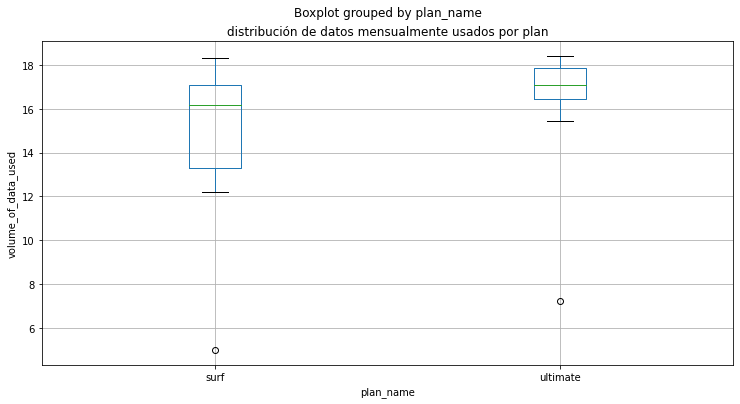

In [53]:
data_box_plot = df_data_prom.boxplot(column = 'volume_of_data_used', by = 'plan_name', figsize = [12,6])
data_box_plot.set_ylabel('volume_of_data_used')
data_box_plot.set_title('distribución de datos mensualmente usados por plan')

El comportamiento de los usuarios del plan `ultimate` esta demasiado concentrado en la parte superior y podemos verlo por el tamaño de su diagrama de caja, mientras que el comportamiento de los usuarios del plan `surf` varia un poco mas.

Esto se puede deber a varias razones, una puede ser que en realidad se concentran de de esa forma a pesar de que sean mucho u otra opcion es que hay mas personas que compran el plan `surf` por que es mas barato y es debido a que hay muchas mas gente que lo compra tiene mas sentido que varie mas debido a que son demasiados usuarios distintos.

Aun asi podemos ver que ha maximos que los del plan `ultimate`.

## Ingreso

In [54]:
#plan name, extra_messages, extra_calls_extra_data para el plan surf
extra_messages = usage_table[usage_table['plan_name']== 'surf']
extra_messages = extra_messages['extra_messages'].sum()
print('Monto de dinero generado de los mensajes extras con el plan surf: $',extra_messages)

extra_calls = usage_table[usage_table['plan_name']== 'surf']
extra_calls = extra_calls['extra_calls'].sum()
print('Monto de dinero generado de las llamadas extras con el plan surf: $',extra_calls)

extra_data = usage_table[usage_table['plan_name']== 'surf']
extra_data = extra_data['extra_data'].sum()
print('Monto de dinero generado de los datos extras con el plan surf: $',extra_data)

dinero_total_extra = extra_messages + extra_calls + extra_data
print('dinero total extra de cargos con plan surf:$',dinero_total_extra)

dinero_surf = usage_table[usage_table['plan_name']== 'surf'] 
mensualidades_surf = dinero_surf['plan_name'].count() * 20
print('dinero generado de todas las mensulidades surf sin cargos extras:$',mensualidades_surf)

dinero_total_surf = mensualidades_surf + dinero_total_extra
print('dinero total generado con el plan surf incluyendo cargo:$:',dinero_total_surf)

Monto de dinero generado de los mensajes extras con el plan surf: $ 330.93
Monto de dinero generado de las llamadas extras con el plan surf: $ 2900.25
Monto de dinero generado de los datos extras con el plan surf: $ 60800.0
dinero total extra de cargos con plan surf:$ 64031.18
dinero generado de todas las mensulidades surf sin cargos extras:$ 31580
dinero total generado con el plan surf incluyendo cargo:$: 95611.18


In [55]:
#plan name, extra_messages, extra_calls_extra_data para el plan ultimate
extra_messages = usage_table[usage_table['plan_name']== 'ultimate']
extra_messages = extra_messages['extra_messages'].sum()
print('Monto de dinero generado de los mensajes extras con el plan ultimate: $',extra_messages)

extra_calls = usage_table[usage_table['plan_name']== 'ultimate']
extra_calls = extra_calls['extra_calls'].sum()
print('Monto de dinero generado de las llamadas extras con el plan ultimate: $',extra_calls)

extra_data = usage_table[usage_table['plan_name']== 'ultimate']
extra_data = extra_data['extra_data'].sum()
print('Monto de dinero generado de los datos extras con el plan ultimate: $',extra_data)

dinero_total_extra = extra_messages + extra_calls + extra_data
print('dinero total extra de cargos con plan surf:$',dinero_total_extra)

dinero_surf = usage_table[usage_table['plan_name']== 'ultimate'] 
mensualidades_surf = dinero_surf['plan_name'].count() * 20
print('dinero generado de todas las mensulidades ultimate sin cargos extras:$',mensualidades_surf)

dinero_total_surf = mensualidades_surf + dinero_total_extra
print('dinero total generado con el plan ultimate incluyendo cargo:$:',dinero_total_surf)

Monto de dinero generado de los mensajes extras con el plan ultimate: $ 0.0
Monto de dinero generado de las llamadas extras con el plan ultimate: $ 0.0
Monto de dinero generado de los datos extras con el plan ultimate: $ 1666.0
dinero total extra de cargos con plan surf:$ 1666.0
dinero generado de todas las mensulidades ultimate sin cargos extras:$ 14480
dinero total generado con el plan ultimate incluyendo cargo:$: 16146.0


En conclusion podemos ver que los ingresos de ambos planes difieren demasiado y que el plan que genera un mayor ingreso es el del plan `surf` ya que mucha mas gente compra este lo cual hace que genere casi el doble de dinero por si solo sin contar los cargos.

Si comparamos los ingresos de los cargos extras en cada una de las areas podemos ver que cada una de las areas de cargos extras del plan `surf` genera mas ingresos.

Por ultimo algo que podemos ver que es similar para ambos planes es que los cargos donde ambos generan menos ingresos son los mensajes y las llamadas extras mientras que para ambos su fuerte para generar mayor ingreso por cargos es la de uso de datos extra.

## Prueba las hipótesis estadísticas

Ahora probaremos la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.

1.Nuestra hipotesis Nula sera que los ingresos promedios procedentes de los planes de llamada `Ultimate` y `Surf` sean iguales.

2. Nuestra Hipostesis alternativa sera que los ingresos promedios procedentes de los plan `Ultiate` y `Surf` sean diferentes.

3. Usare un ttest

4. Nuestro valor alfa sera de 0.05 osea del 5 porciento

In [56]:
#Crear columna con ingresos promedios
usage_table['total_cargos']= usage_table['extra_messages'] + usage_table['extra_calls'] + usage_table['extra_data']
usage_table['ingreso_total'] = usage_table['total_cargos'] + usage_table['usd_monthly_pay']

In [57]:
# Prueba las hipótesis-Que debo de hacer para obtener el promedio  procedentes de los usuarios de los planes de llamada Ultimate y Surf.
ingreso_ultimate = usage_table[usage_table['plan_name']=='ultimate']['ingreso_total']
ingreso_surf = usage_table[usage_table['plan_name']=='surf']['ingreso_total']

In [58]:
alpha = .05
results,pvalue = ttest_ind(ingreso_ultimate, ingreso_surf)
display('p-value', pvalue)

if pvalue < alpha:
    display('Rechazamos la hipotesis nula')
else: 
    display('No se puede rechazar la hipotesis nula')

'p-value'

1.724423314124219e-08

'Rechazamos la hipotesis nula'

**Como podemos ver rechazamos nuestra hipotesis ya que el porcentaje esta muy lejano a 5 lo cual significa que el comportamiento de los planes no es el mismo si no que hay una gran diferencia entre sus comportamientos.**

Ahora probaremos la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

1.Nuestra hipotesis Nula sera que los ingresos promedios procedentes de los usuarios del area `NY-NJ` sean iguales a la de las demas areas.

2. Nuestra Hipostesis alternativa sera que los ingresos promedios procedentes de los usuarios del area `NY-NJ` sean diferentes a la de los usuarios de las demas areas.

3. Usare un ttest

4. Nuestro valor alfa sera de 0.05 osea del 5 porciento

In [59]:
my_nj_users = usage_table[usage_table['city']== 'New York-Newark-Jersey City, NY-NJ-PA MSA']['ingreso_total']
other_cities_users = usage_table[usage_table['city']!= 'New York-Newark-Jersey City, NY-NJ-PA MSA']['ingreso_total']

In [60]:
# Prueba las hipótesis
alpha = .05
results,pvalue = ttest_ind(my_nj_users, other_cities_users)
display('p-value', pvalue)

if pvalue < alpha:
    display('Rechazamos la hipotesis nula')
else: 
    display('No se puede rechazar la hipotesis nula')

'p-value'

0.049745282774076104

'Rechazamos la hipotesis nula'

**Como podemos ver rechazamos nuestra hipotesis ya que el porcentaje esta muy lejano a 5 lo cual significa que el comportamiento de los usuarios del area 'NY-NJ' no es el mismo que el de las demas areas si no que hay una diferencia entre sus comportamientos, aunque debemos admitir que estuvo cerca del 5 porciento a comparacion con nuestra hipotesis anterior.**

## Conclusión general
En este analisis que hizimos se nos pedia poder indentificar cual era el plan que generaba mas ingresos y podemoas dar respuesta a eso diciendo que el plan `surf` es el plan que genera mas ingresos y que tiene mas usuarios que lo compran en comparacion a los usuarios que compran el plan `ultimate`.

Y tambien podemos ver que el plan `ultimate` no genera dinero de los cargos por mensajes y llamadas, solo para los cargos extra por exceso de uso de datos.

Y por ultimo podemos ver que para ambos planes generan mucho dinero por cargos de uso de datos en exceso pero que generan muy poco por exceso de uso de mensajes y llamadas.